In [1]:
import os
import sys
from os.path import join as pjoin
import numpy as np
import importlib

import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
data_dir = '/scratch/users/austin.zane/ucsf_fast/data/pilot_labeling/AnnotationData/MorisonPouchMasks_1-23'
image_path = pjoin(data_dir, 'A_EL1N1D_77.png')
mask_path = pjoin(data_dir, 'A_EL1N1D_77_Morison.png')

sys.path.append('/accounts/campus/austin.zane/ucsf_fast')
from common.datasets import FASTDataset

In [3]:
custom_dataset = FASTDataset(data_dir=data_dir)
dataloader = DataLoader(custom_dataset, batch_size=len(custom_dataset), shuffle=True)

In [4]:
for images, labels in dataloader:
    print(images.shape, labels.shape)
    train_img = images
    train_label = labels

torch.Size([384, 1, 720, 960]) torch.Size([384, 1, 720, 960])


In [23]:
ex_image = train_img[3]
ex_label = train_label[3]

In [24]:
torch.max(ex_label)

tensor(1.)

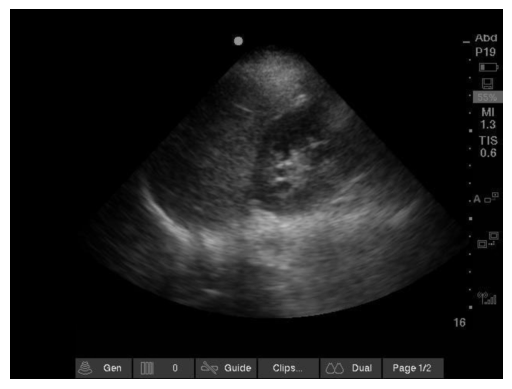

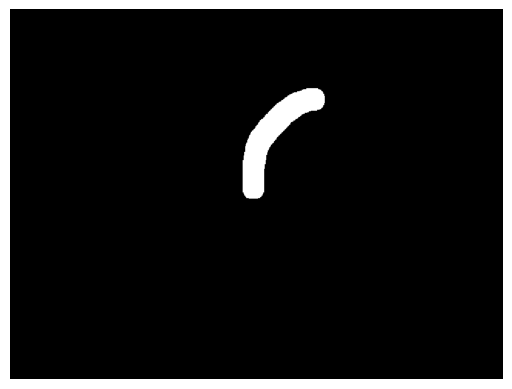

In [25]:
plt.imshow(ex_image.squeeze(), cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(ex_label.squeeze(), cmap='gray')
plt.axis('off')
plt.show()

## Set final layer bias

We find the average value of the masks so that we can set the bias of the final layer to something more reasonable.

In [7]:
train_label.shape

torch.Size([384, 1, 720, 960])

In [8]:
torch.mean(train_label)

tensor(0.0158)